### Load libraries.

In [1]:
import geopandas as geopd
import pandas as pd

### Load Mexico shape file. Source: Marco Geoestadístico INEGI (2023).
#### URL: https://www.inegi.org.mx/temas/mg/ 

In [14]:
# INEGI data
gdf = geopd.read_file("../dataset/Mexico/geometry/2023_1_00_ENT/2023_1_00_ENT.shp")

### Display data frame entries

- CVEGEO: Geoestatistical code provided by INEGI.
- CVE_ENT: State code provided by INEGI.
- CVE_MUN: Municipality code provided by INEGI.
- NOMGEO: Municipality name provided by INEGI.
- geometry: Municipality boundary provided by INEGI (polygons).

In [15]:
display(gdf)

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,"MULTIPOLYGON (((-91.95650 20.19700, -91.95636 ..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((-102.31549 29.88000, -102.31509 29.8..."
5,06,06,Colima,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
6,07,07,Chiapas,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
7,08,08,Chihuahua,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
8,09,09,Ciudad de México,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
9,10,10,Durango,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


### Stationary pollution sources. Display data frame entries. Source DENUE-INEGI.
#### URL: https://www.inegi.org.mx/app/mapa/denue/default.aspx
- CVE_ENT: State code provided by INEGI.
- NOMENT: Municipality name provided by INEGI.
- ACTIVIDAD: Industrial activity
- CVE_MUN: Municipality code provided by INEGI.
- geometry: Latitude, longitude coordinates.

In [16]:
# Plot Mexico's map labeling each state by a color. 

df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")

gdf_stationary_pullution_sources = geopd.GeoDataFrame(
    df, geometry=geopd.points_from_xy(df.X,df.Y, crs="epsg:4326",
))

display(gdf_stationary_pullution_sources)


,id,cve_ent,nom_ent,actividad,X,Y,Unnamed: 6,geometry
0,FQ1,24,San Luis Potosí,Fabricacion de Quimicos,-100.876628,22.102930,NaN,POINT (-100.87663 22.10293)
1,FQ2,24,San Luis Potosí,Fabricacion de Quimicos,-100.992320,22.166703,NaN,POINT (-100.99232 22.16670)
2,FQ3,24,San Luis Potosí,Fabricacion de Quimicos,-100.879019,22.069436,NaN,POINT (-100.87902 22.06944)
3,FQ4,24,San Luis Potosí,Fabricacion de Quimicos,-100.893507,22.061079,NaN,POINT (-100.89351 22.06108)
4,FQ5,24,San Luis Potosí,Fabricacion de Quimicos,-100.882499,22.071247,NaN,POINT (-100.88250 22.07125)
...,...,...,...,...,...,...,...,...
1830,L4048410,28,Tamaulipas,Ladrillera,-98.293578,26.105376,NaN,POINT (-98.29358 26.10538)
1831,L4116771,28,Tamaulipas,Ladrillera,-98.274972,26.108096,NaN,POINT (-98.27497 26.10810)
1832,L9041195,28,Tamaulipas,Ladrillera,-98.271700,26.034586,NaN,POINT (-98.27170 26.03459)
1833,L4048400,28,Tamaulipas,Ladrillera,-98.283778,26.108146,NaN,POINT (-98.28378 26.10815)


### Plot stationary pollution sources

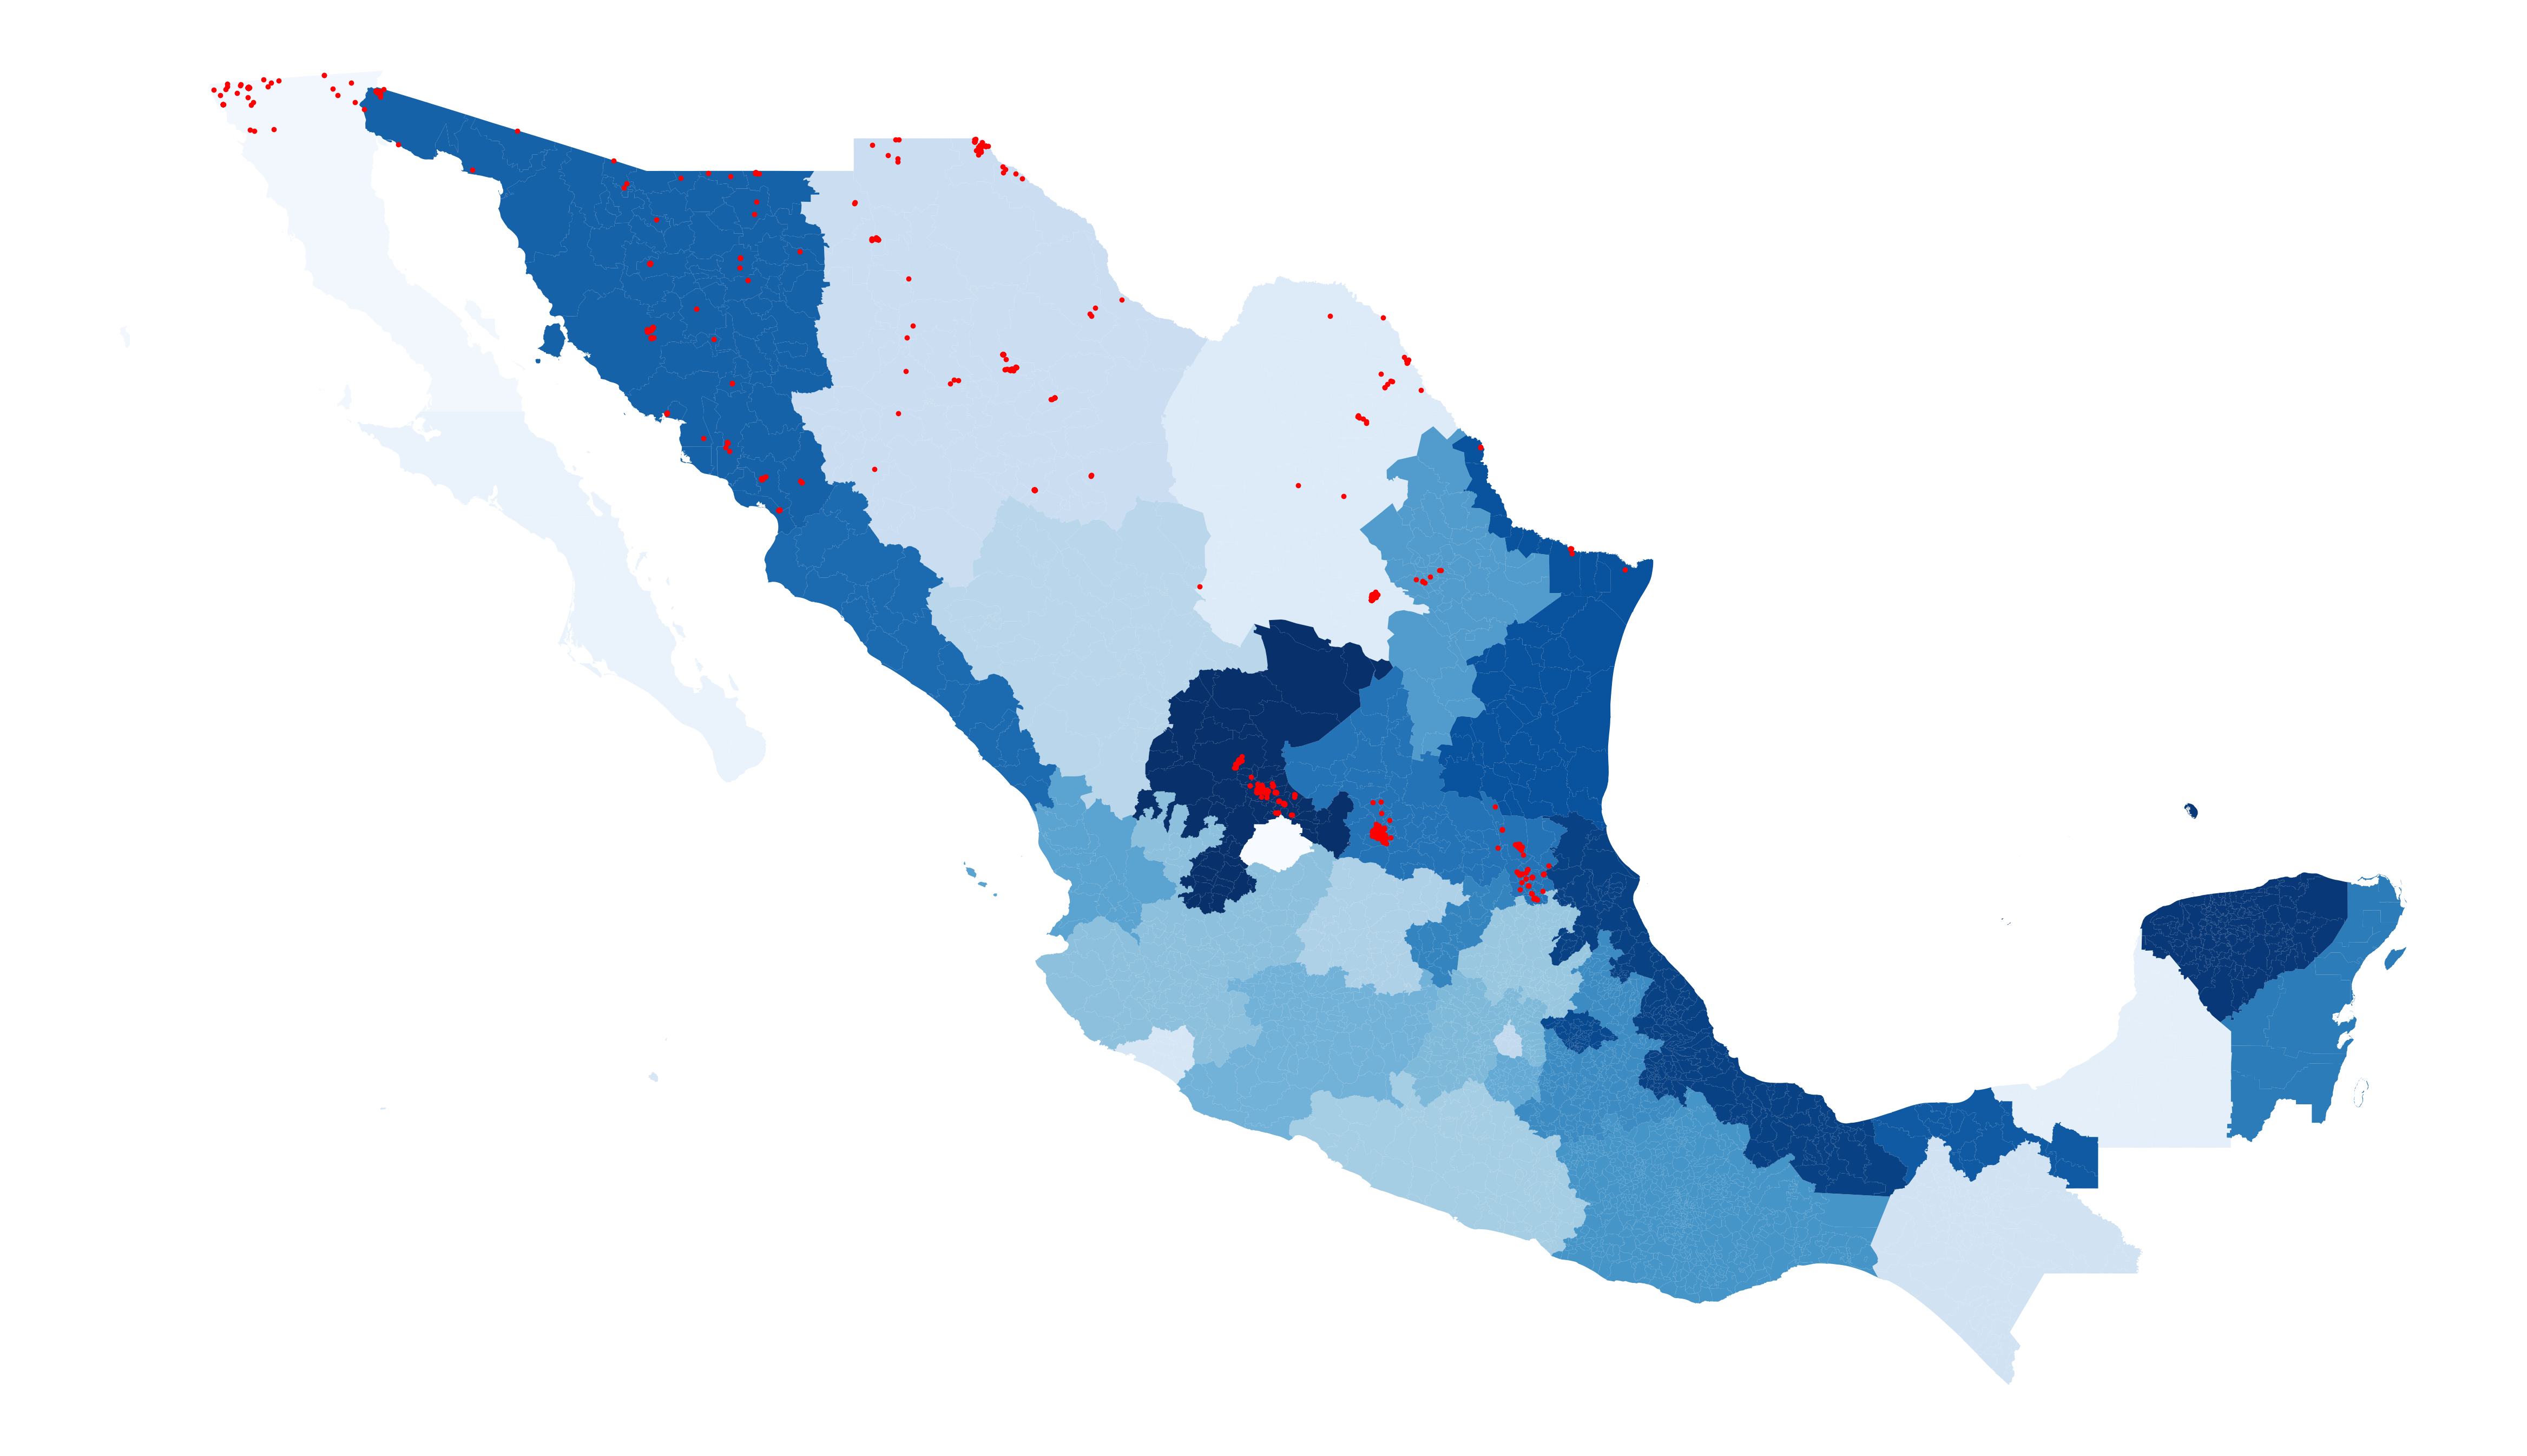

In [13]:
ax = gdf.plot(figsize = (60, 60),column="CVE_ENT",cmap="Blues")

gdf_stationary_pullution_sources.plot(ax=ax,figsize = (60, 60),aspect=1, color="red")
ax.set_axis_off()